# Zona de Pruebas

message: "Test1" payload: [2, 42, 25, 46, 55, 33, 68]


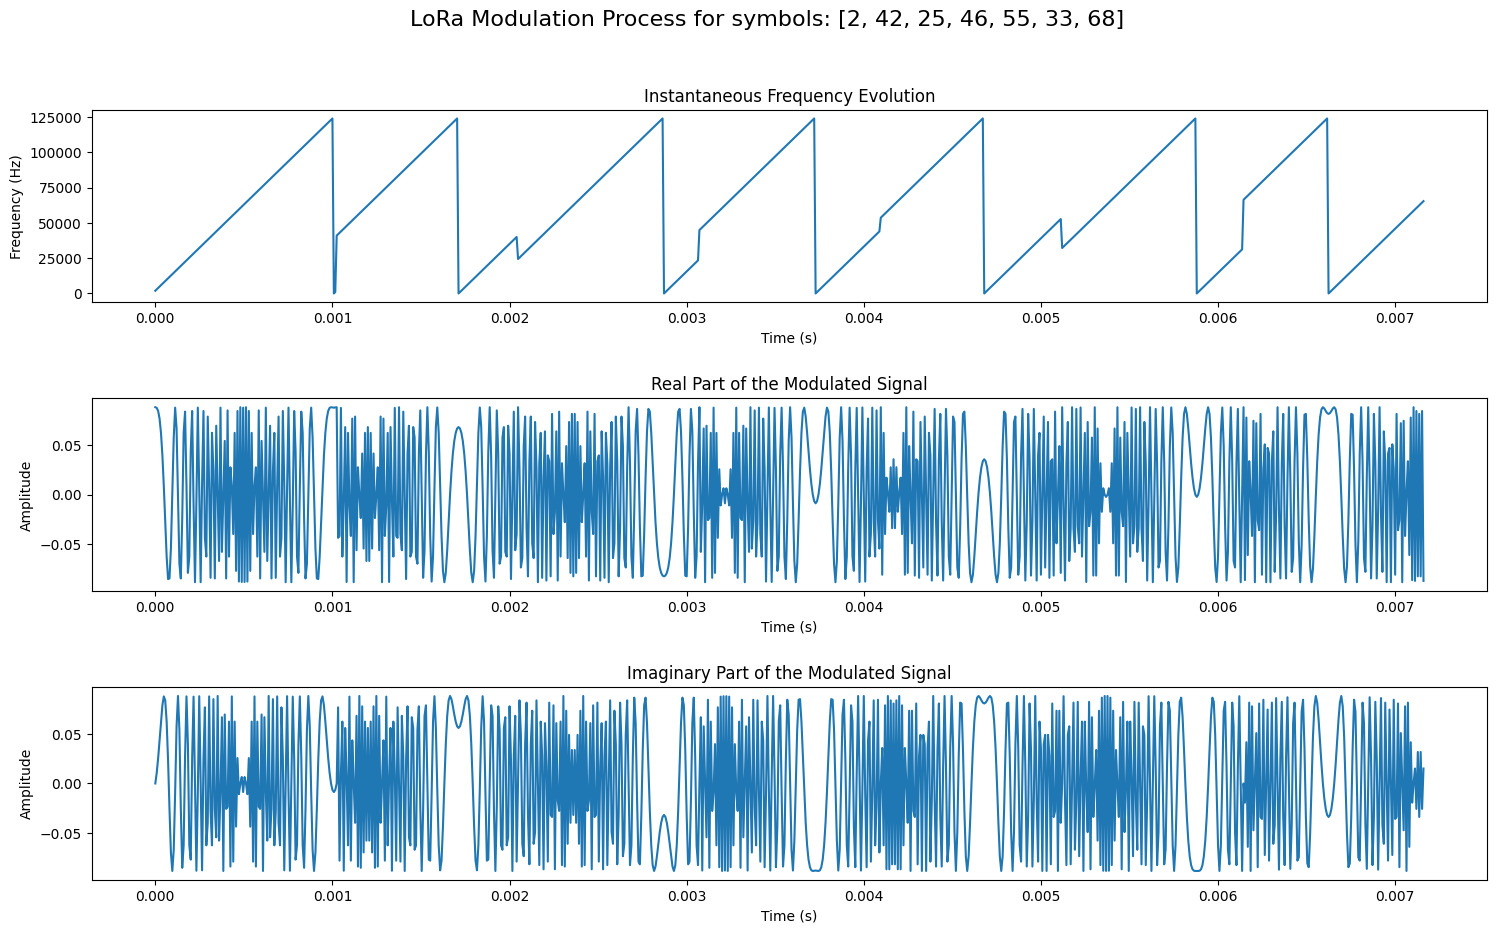

Synchronization started...
Phase 1: Searching for upchirps...
Phase 2: Ensuring that the candidate upchirp is a preamble member...
Preamble allegedly found at index:  30
Synchronization successful!
-----------------------------------------------------------
Preamble found at index:  30
Package length:  7
Payload starts at index:  1598
Reconstructed preamble: [10 upchirps, 2 downchirps]


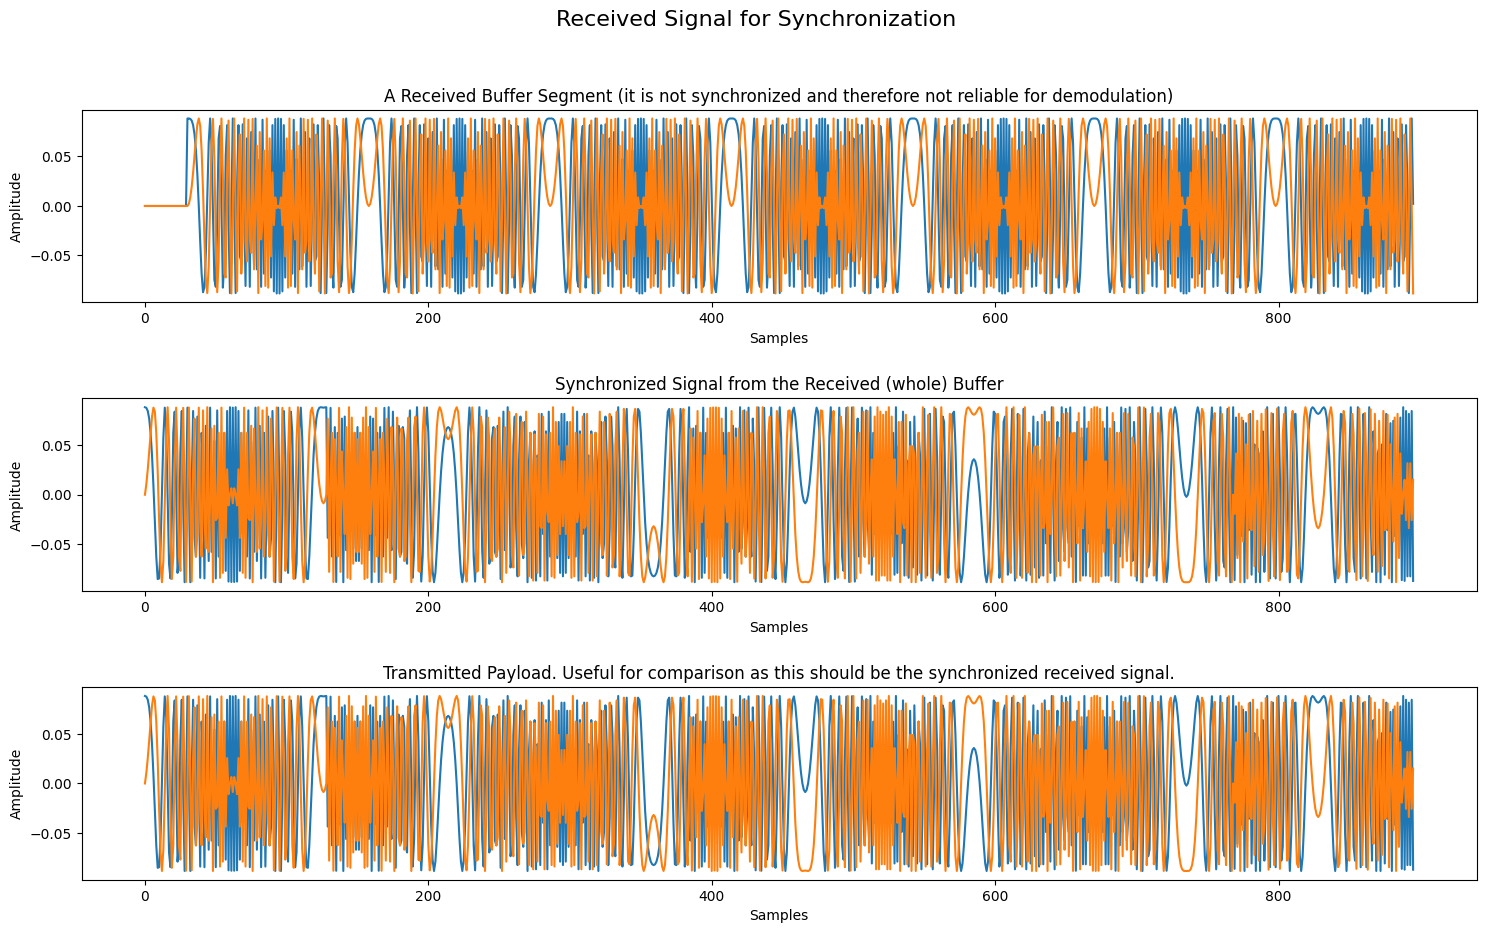

Synchronization pattern start found at index 1054
Message body start found at index 1598


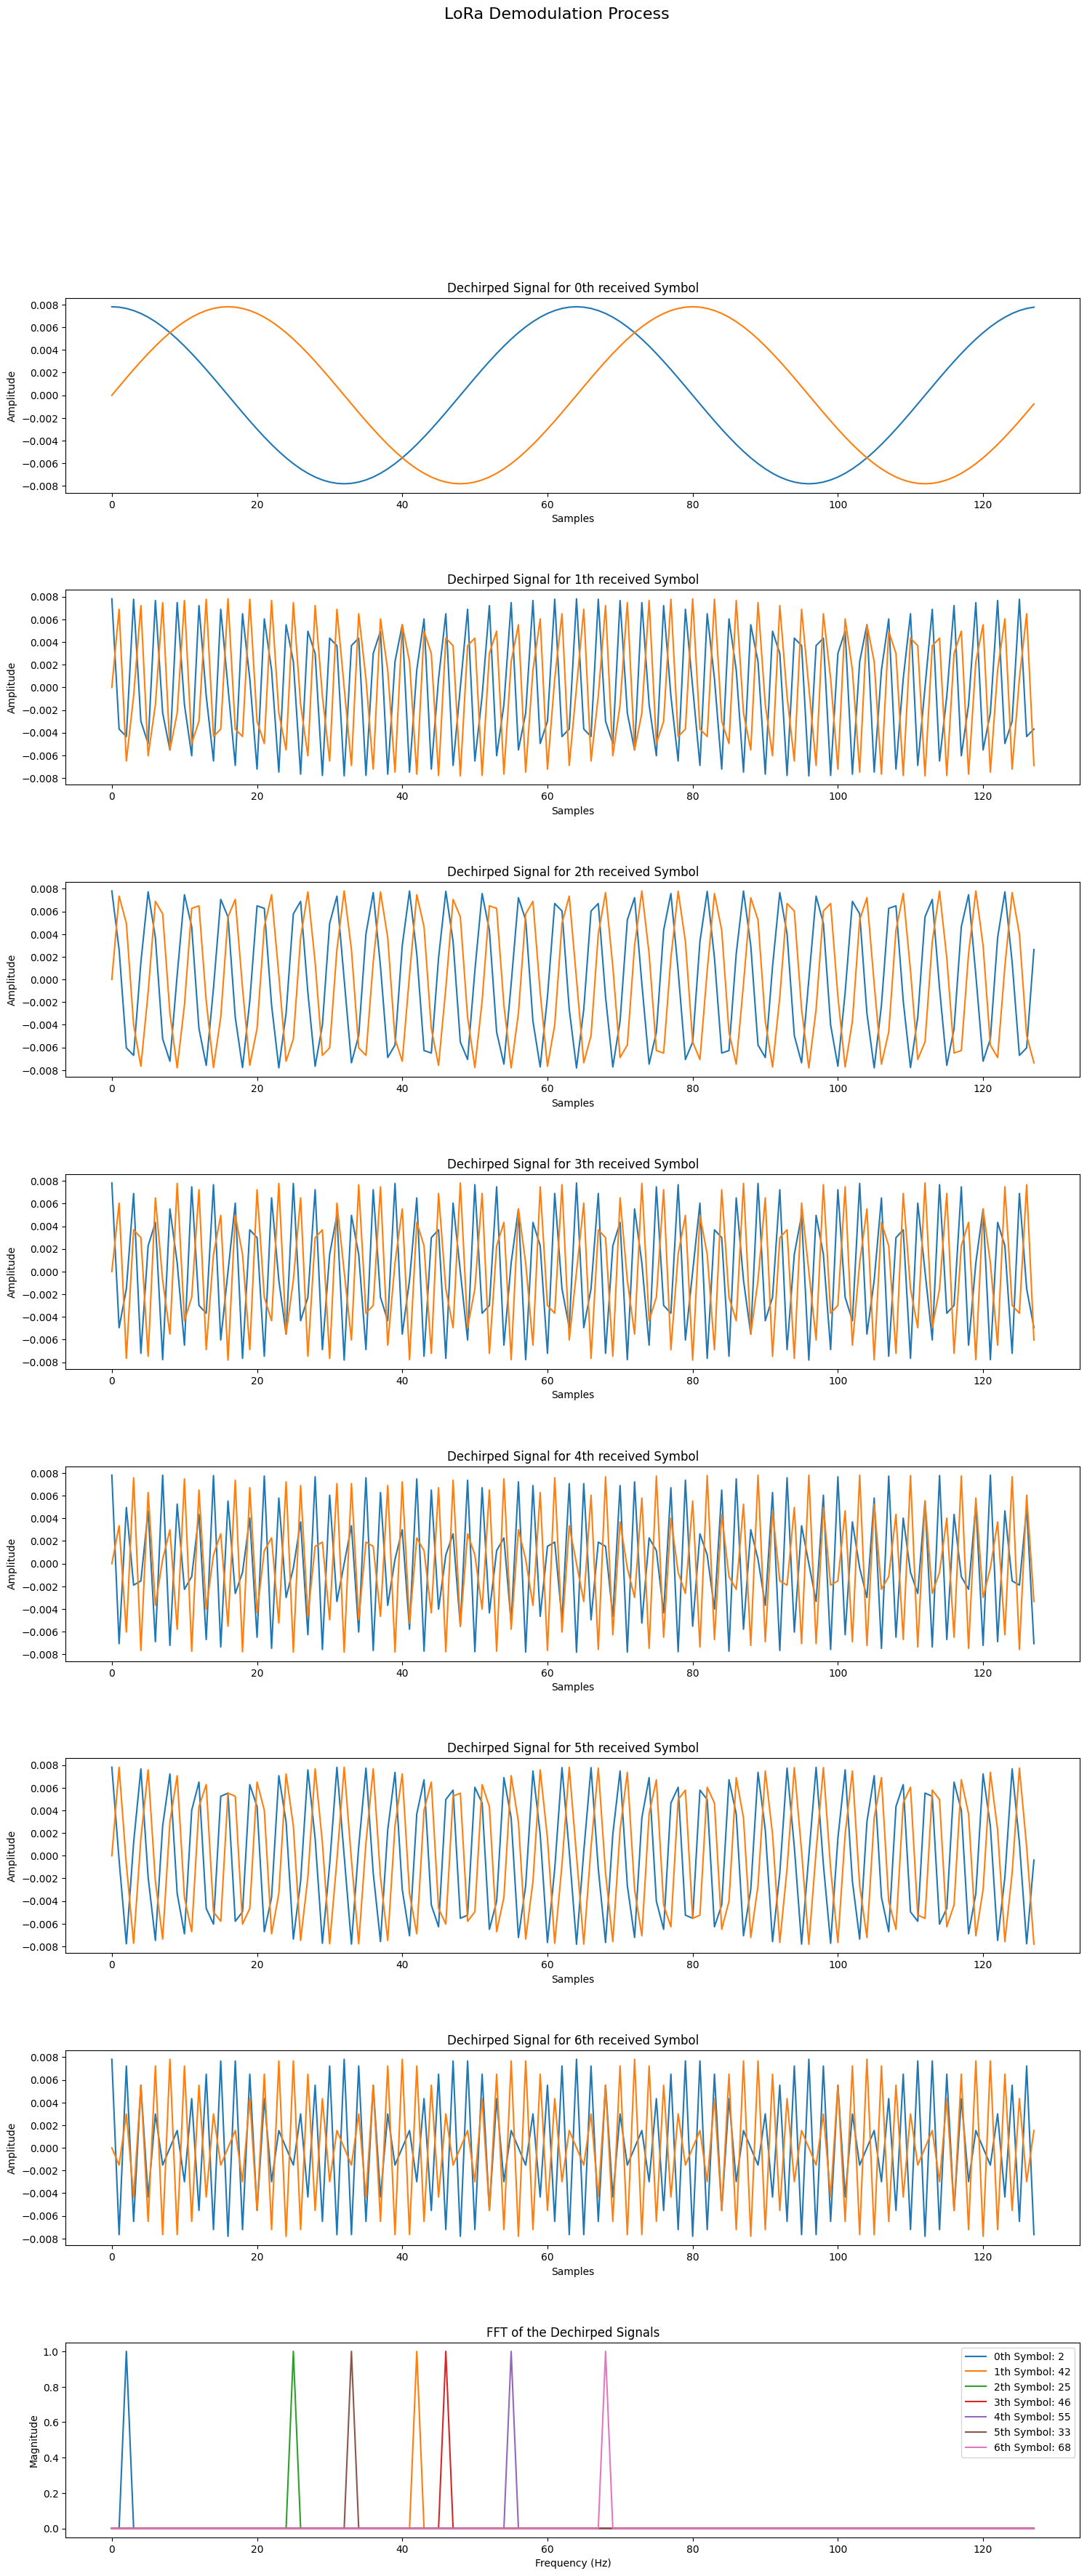

Se ha recivido el mensaje: Test1


In [5]:
#lib
import numpy as np
import matplotlib.pyplot as plt
from lora_modem import LoraModulator, LoraDemodulator, LoraReservedArtifacts, LoraOriginalSynchronizer, LoraCorrelationSynchronizer, SimpleLoraMoDem, Codec

# Parámetros
spreading_factor = 7
bandwidth = 125e3
samples_per_chip = 1
preamble_length = 8

# Generación de los modem
modulator = LoraModulator(spreading_factor, bandwidth, samples_per_chip)
demodulator = LoraDemodulator(spreading_factor, bandwidth, samples_per_chip)

vangelista_modem = SimpleLoraMoDem(spreading_factor, bandwidth, samples_per_chip)

og_synchronizer = LoraOriginalSynchronizer(spreading_factor,samples_per_chip, demodulator, preamble_length)
cor_synchronizer = LoraCorrelationSynchronizer(spreading_factor,samples_per_chip, bandwidth, modulator.get_sync_basis())

codec = Codec(spreading_factor, bandwidth, samples_per_chip)

# Mensaje
message = b"Test1"
payload = codec.encode(message)
print(f"message: \"{message.decode('utf-8')}\" payload: {payload}")

# Modulación
signal, payload_signal = modulator.modulate_n_plot_explicit_package(preamble_length, payload, return_payload_signal=True)

# Simulación de canal
rx_signal = np.concatenate([np.zeros(30), signal])

# Sincronización
synced_signal = og_synchronizer.synchronize_rx_buffer(rx_signal)
og_synchronizer.plot_synchronization(rx_signal, synced_signal, payload_signal)

synced_signal_cor = cor_synchronizer.synchronize_rx_buffer(rx_signal)

# Demodulación
rx_payload = demodulator.demodulate_n_plot_symbols(synced_signal)

rx_mesaage = codec.decode(rx_payload).decode('utf-8')
print(f"Se ha recivido el mensaje: {rx_mesaage}")
